- Regressão logística
- Redes Neurais Artificiais Profundas:
1. M1 DNN
2. M2 DNN
- SVM

1. treinamento 2. validação 3. testes(avaliação final)

Amostra: n instâncias
validação: fáceis de reconhecer
testes: difíceis de reconhecer

testes vs validação
Testes: avaliação final
Validação: vem sempre depois do treinamento

In [ ]:
#!pip install keras
#!pip install tensorflow

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'


In [ ]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [ ]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [ ]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [ ]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [ ]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [ ]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [ ]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [ ]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [ ]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [ ]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [ ]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 4s 4ms/step - loss: 1.0860 - accuracy: 0.4237 - val_loss: 1.0567 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 1s 3ms/step - loss: 1.0035 - accuracy: 0.4736 - val_loss: 1.0590 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 1s 3ms/step - loss: 1.0007 - accuracy: 0.4736 - val_loss: 1.0553 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 1s 3ms/step - loss: 0.9979 - accuracy: 0.4737 - val_loss: 1.0552 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 1s 3ms/step - loss: 0.9947 - accuracy: 0.4741 - val_loss: 1.0526 - val_accuracy: 0.4480
Epoch 6/50
303/303 [==============================] - 2s 5ms/step - loss: 0.9911 - accuracy: 0.4766 - val_loss: 1.0520 - val_accuracy: 0.4492
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9870 - accuracy: 0.4820 - val_loss: 1.0453 - val_accuracy: 0.4571
Epoch 

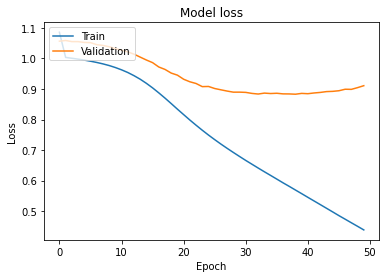

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

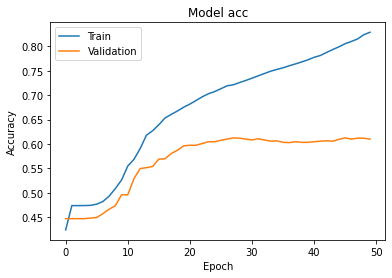

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [ ]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 3ms/step - loss: 0.9035 - accuracy: 0.6211


In [ ]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.05628552, 0.16223234, 0.78148216],
       [0.00508456, 0.01293677, 0.9819787 ],
       [0.08637527, 0.87004894, 0.04357586],
       ...,
       [0.23377982, 0.4674697 , 0.29875046],
       [0.03018055, 0.05201645, 0.917803  ],
       [0.13362537, 0.56164336, 0.3047313 ]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [ ]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

Validação cruzada

k=3                           


Fold 1 -  Train
Fold 2 - Train
Fold 3 - Test

1º Run/1ª trial
n instâncias - Extrair taxa classif. correta; Erro teste

Fold 1 -  Train
Fold 2 - Test
Fold 3 - Train

2º Run/2ª trial
n instâncias - Extrair taxa classif. correta; Erro teste

        M1   M2
Run 1   90%  100%
Run 2   80%  50%
Run 3   85%  70%

O 1 é melhor. 
IIA

Desbalanceamento 

Dados de teste -> Modelo -> predições +,-
```
        Predita
        +   -
Real +  1   2
     -  2   1

Predição  Classe Real(Atual)
 +            -
 +            +
 -            +
 -            -
 +            -
 -            +
```




Matriz de confusão Multi-classe

```
        Predita
       0    1    2

Real 0

     1

     2
     
```


In [ ]:
matriz_conf = [[0,0,0],[0,0,0],[0,0,0]]
matriz_conf1 = [[0,0,0],[0,0,0],[0,0,0]]
y_real = y_test_int
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [ ]:
y_real

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

In [ ]:
for i in range(len(y_pred)):
  if(y_real[i]==0 and y_pred[i]==0):
    matriz_conf1[0][0]+=1
  elif(y_real[i]==1 and y_pred[i]==0):
    matriz_conf1[1][0]+=1
  elif(y_real[i]==0 and y_pred[i]==1):
    matriz_conf1[0][1]+=1
  elif(y_real[i]==1 and y_pred[i]==1):
    matriz_conf1[1][1]+=1
  elif(y_real[i]==0 and y_pred[i]==2):
    matriz_conf1[0][2]+=1
  elif(y_real[i]==2 and y_pred[i]==0):
    matriz_conf1[2][0]+=1
  elif(y_real[i]==2 and y_pred[i]==2):
    matriz_conf1[2][2]+=1
  elif(y_real[i]==1 and y_pred[i]==2):
    matriz_conf1[1][2]+=1
  elif(y_real[i]==2 and y_pred[i]==1):
    matriz_conf1[2][1]+=1
np.array(matriz_conf1)

array([[  29,  430,  100],
       [   1, 1252,  260],
       [   8,  545,  922]])

In [ ]:
for i in range(len(y_pred)):
  matriz_conf[y_real[i]][y_pred[i]]+=1


In [ ]:
np.array(matriz_conf)

array([[  29,  430,  100],
       [   1, 1252,  260],
       [   8,  545,  922]])

Acurácia

In [ ]:
acc = (matriz_conf[0][0] + matriz_conf[1][1] + matriz_conf[2][2]) / len(y_pred)
acc

0.6210882435861291

Precisão: 
```
Pr = VP/(VP+FP)
```

Revocação:
```
Rv = VP/(VP+FN)
```

F Score
```
F1 = 2 * (Pr*Rv)/(Pr+Rv)
```

One against all



```
# positiva all (negative, neutro)
Pr = 
Rv = 
F1_Score = 

# neutra all (positivo, neutro)
Pr = 
Rv = 
F1_Score = 

# negativa all (neutro, positiva)
Pr = 
Rv = 
F1_Score = 
```





```
           Predita
         0   1    2
Real  0  VP  FN  FN
      1  FP
      2  FP
```



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.05      0.10       559
           1       0.56      0.83      0.67      1513
           2       0.72      0.63      0.67      1475

    accuracy                           0.62      3547
   macro avg       0.68      0.50      0.48      3547
weighted avg       0.66      0.62      0.58      3547



Precision Negativo

In [ ]:
prece = matriz_conf[0][0]/(matriz_conf[0][0] + matriz_conf[1][0] + matriz_conf[2][0])
prece

0.7631578947368421

Precision Neutro

In [ ]:
precn = matriz_conf[1][1]/(matriz_conf[1][1] + matriz_conf[0][1] + matriz_conf[2][1])
precn

0.5621912887292322

Precision Positivo

In [ ]:
precs = matriz_conf[2][2]/(matriz_conf[2][2] + matriz_conf[0][2] + matriz_conf[1][2])
precs

0.719188767550702

Recall Negativo

In [ ]:
recalle= matriz_conf[0][0]/(matriz_conf[0][0] + matriz_conf[0][1] + matriz_conf[0][2])
recalle

0.0518783542039356

Recall Neutro

In [ ]:
recalln= matriz_conf[1][1]/(matriz_conf[1][1] + matriz_conf[1][0] + matriz_conf[1][2])
recalln

0.8274950429610046

Recall Positivo

In [ ]:
recallp= matriz_conf[2][2]/(matriz_conf[2][2] + matriz_conf[2][1] + matriz_conf[2][0])
recallp

0.6250847457627119

F1_Score Negativo

In [ ]:
F1_Score= 2*(prece*recalle)/(prece + recalle)
F1_Score

0.09715242881072027

F1_Score Neutro

In [ ]:
F1_Score= 2*(precn*recalln)/(precn + recalln)
F1_Score

0.6695187165775401

F1_Score Positivo

In [ ]:
F1_Score= 2*(precs*recallp)/(precs + recallp)
F1_Score

0.6688429452303228